In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

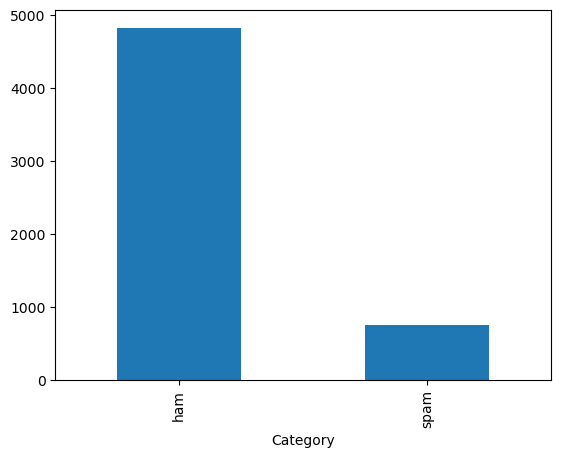

In [5]:
df['Category'].value_counts().plot(kind='bar')

In [6]:
df['Category'].value_counts(normalize=True)

Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

## Text Cleaning
1. Remove Punctuation
2. Remove Stopwords
3. Stemming/Lemmatization

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [8]:
corpus=[]
for i in range(len(df)):
    rp=re.sub("[^a-zA-Z]"," ", df['Message'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word) for word in rp if word not in (stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)

## Vectorization
Count Words (Bag Of Words)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df['Category'])

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

## Modeling

Naive Bayes Classifier with default parameters

In [12]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

### Predictions

In [13]:
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

# Evaluation

In [14]:
from sklearn.metrics import accuracy_score
print("Train accuracy=",accuracy_score(y_train,ypred_train))
print("Test accuracy=",accuracy_score(y_test,ypred_test))

Train accuracy= 0.9907692307692307
Test accuracy= 0.979066985645933


## Prediction On New Data

In [15]:
new_data=pd.DataFrame({'Message':"I‘m going to try for 2 months ha ha only joking"},index=[0])
new_data

,Message
0,I‘m going to try for 2 months ha ha only joking


In [16]:
## Text Cleaning
corpus=[]
for i in range(len(new_data)):
    rp=re.sub("[^a-zA-B]"," ",new_data['Message'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word) for word in rp if word not in (stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)

## Text Vectorization
X=cv.transform(corpus).toarray()

In [17]:
print(le.inverse_transform([model.predict(X)])[0])

ham
